# classify Cifar 10 dataset using vanilla CNN

In [1]:
# Import Libraries

In [3]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, Activation
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [6]:
# download fashion mnist dataset using keras
from keras.datasets import cifar10

In [7]:
# setting random seed so that initial value of random variable will be the same
from numpy.random import seed
seed(42)

In [8]:
# get fashion cifar10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [9]:
categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

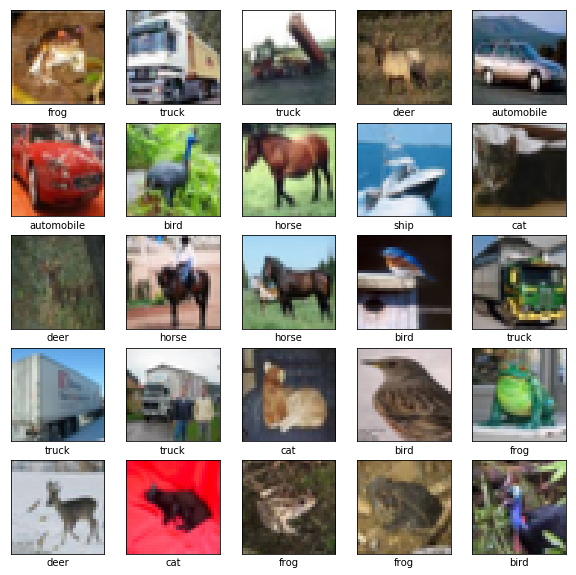

In [10]:
# diplay random images from training dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(categories[y_train[i][0]])
plt.show()

In [11]:
# dimensions of training data
print("dimensions of training data: {shape}".format(shape=x_train.shape))
print("dimensions of training data: {shape}".format(shape=y_train.shape))

# dimensions of test set
print("dimensions of test set: {shape}".format(shape=x_test.shape))
print("dimensions of test set: {shape}".format(shape=y_test.shape))

dimensions of training data: (50000, 32, 32, 3)
dimensions of training data: (50000, 1)
dimensions of test set: (10000, 32, 32, 3)
dimensions of test set: (10000, 1)


In [14]:
batch_size = 32
num_classes = 10
epochs = 10

In [15]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [16]:
# preprocessing (standardization) dataset
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)       

In [20]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])

In [80]:
# vary the the parameters for different result, on increasing the no of epochs result will improve

In [21]:
train_model = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 133s 3ms/sample - loss: 1.7828 - acc: 0.3450 - val_loss: 1.5189 - val_acc: 0.4563
Epoch 2/10
50000/50000 [==============================] - 134s 3ms/sample - loss: 1.4687 - acc: 0.4676 - val_loss: 1.3129 - val_acc: 0.5306
Epoch 3/10
50000/50000 [==============================] - 127s 3ms/sample - loss: 1.3351 - acc: 0.5218 - val_loss: 1.2418 - val_acc: 0.5539
Epoch 4/10
50000/50000 [==============================] - 121s 2ms/sample - loss: 1.2429 - acc: 0.5574 - val_loss: 1.1212 - val_acc: 0.6080
Epoch 5/10
50000/50000 [==============================] - 129s 3ms/sample - loss: 1.1656 - acc: 0.5872 - val_loss: 1.0732 - val_acc: 0.6241
Epoch 6/10
50000/50000 [==============================] - 128s 3ms/sample - loss: 1.0973 - acc: 0.6140 - val_loss: 0.9960 - val_acc: 0.6579
Epoch 7/10
50000/50000 [==============================] - 118s 2ms/sample - loss: 1.0450 - acc: 0.6324 - val_l

In [22]:
print(train_model.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


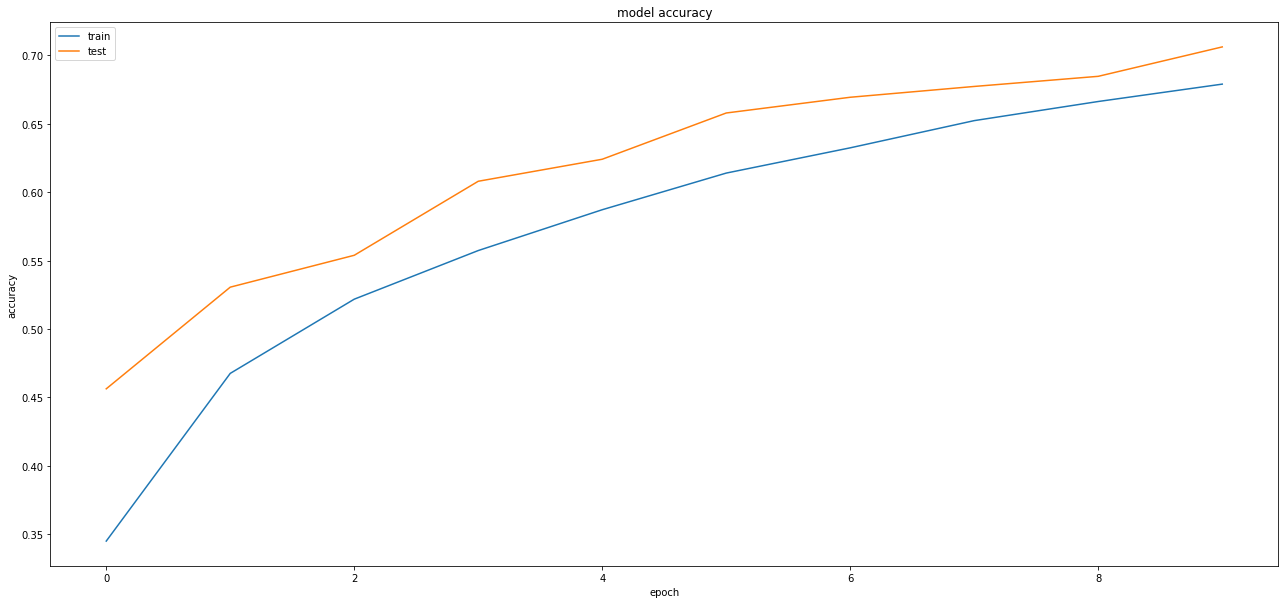

In [23]:
plt.figure(figsize=(22, 10))
plt.plot(train_model.history['acc'])
plt.plot(train_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.ylim((0.9,.94))
plt.legend(['train', 'test'], loc='upper left')
plt.show()

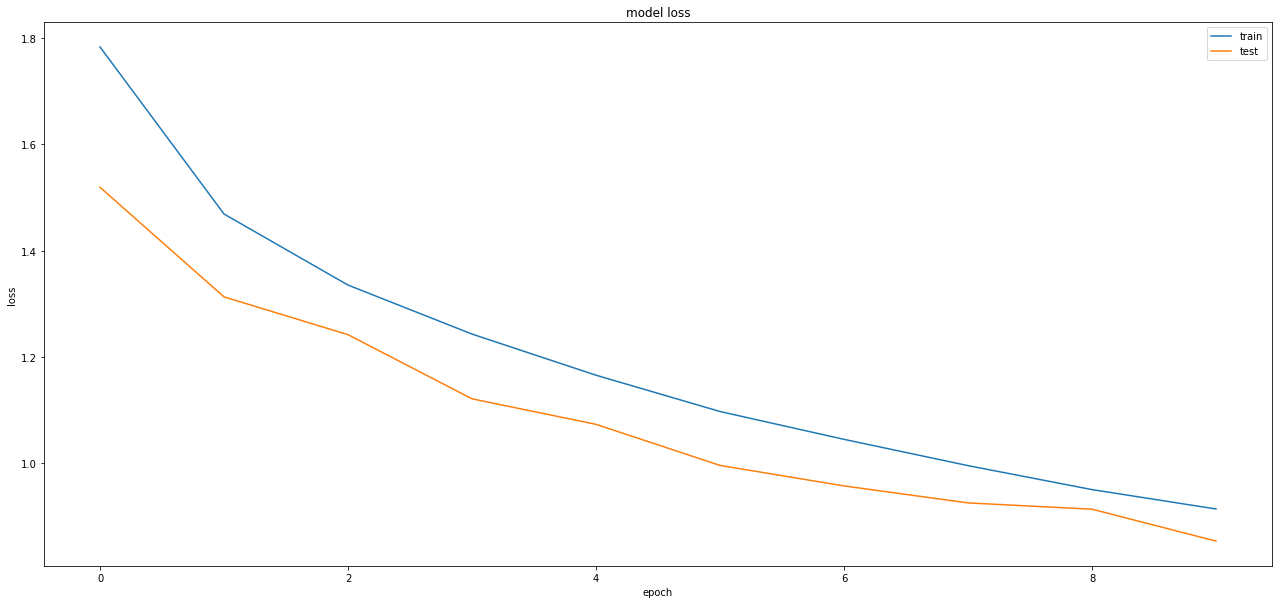

In [24]:
plt.figure(figsize=(22, 10))
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.ylim((0,.3))
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [26]:
# Alternate visualization method

In [27]:
def create_trace(x,y,ylabel,color):
    trace = go.Scatter(
        x = x,y = y,
        name=ylabel,
        marker=dict(color=color),
        mode = "markers+lines",
        text=x
    )
    return trace

def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    
    iplot(fig, filename='accuracy-loss')

In [28]:
plot_accuracy_and_loss(train_model)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [30]:
#get the predictions for the test data
predicted_classes = model.predict_classes(x_test)
y_true = y_test

In [71]:
p = predicted_classes
y = np.argmax(y_true, axis=1)
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [72]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 7062
Incorrect predicted classes: 2938


In [75]:
target_names = ["Class {} ({}) :".format(i,categories[i]) for i in range(num_classes)]
print(classification_report(y, predicted_classes, target_names=target_names))

                        precision    recall  f1-score   support

  Class 0 (airplane) :       0.76      0.76      0.76      1000
Class 1 (automobile) :       0.80      0.84      0.82      1000
      Class 2 (bird) :       0.59      0.60      0.60      1000
       Class 3 (cat) :       0.52      0.51      0.51      1000
      Class 4 (deer) :       0.68      0.58      0.63      1000
       Class 5 (dog) :       0.61      0.62      0.62      1000
      Class 6 (frog) :       0.74      0.82      0.78      1000
     Class 7 (horse) :       0.75      0.75      0.75      1000
      Class 8 (ship) :       0.81      0.81      0.81      1000
     Class 9 (truck) :       0.80      0.77      0.78      1000

           avg / total       0.71      0.71      0.71     10000



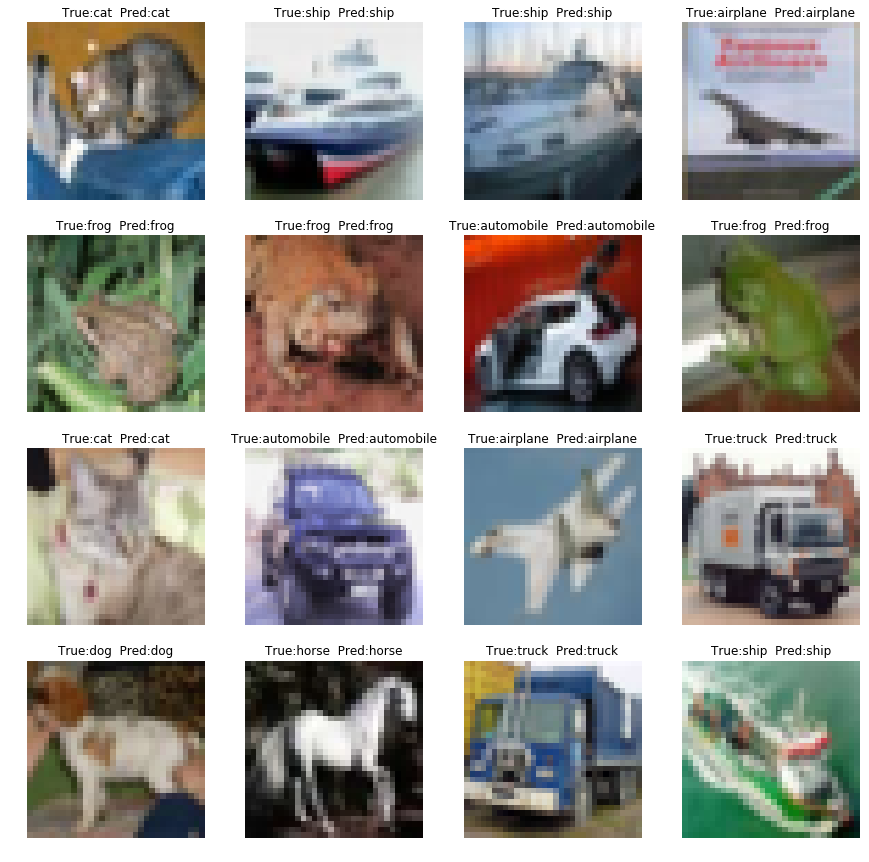

In [77]:
def plot_images(data_index):
    f, ax = plt.subplots(4,4, figsize=(15,15))

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(x_test[indx])
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(categories[y[indx]],categories[predicted_classes[indx]]))
    plt.show()    
    
plot_images(correct)

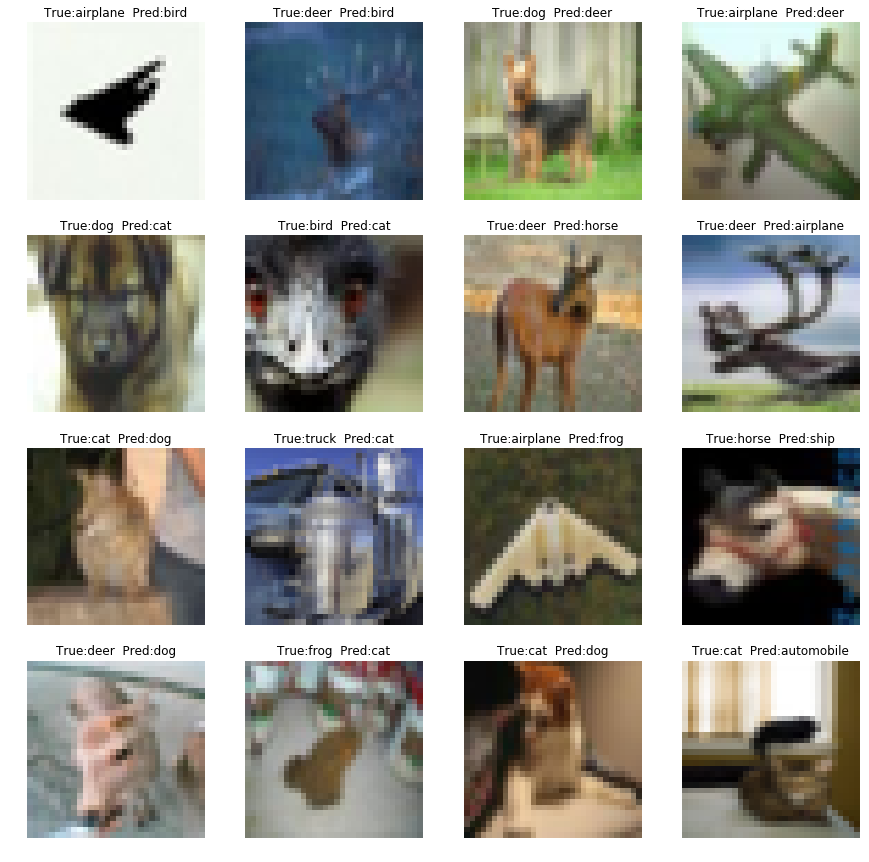

In [78]:
plot_images(incorrect)